In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

In [2]:
df_final = pd.read_csv("./Data_sets/licencias_2024_limpio_P.csv")
df = df_final.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18915 entries, 0 to 18914
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sexo                           18915 non-null  object 
 1   fechanacimiento                18915 non-null  object 
 2   descripcionprovinciadomicilio  18915 non-null  object 
 3   estado                         18915 non-null  int64  
 4   fechaaltasolicitud             18915 non-null  object 
 5   temporada                      18915 non-null  int64  
 6   modalidad                      18915 non-null  object 
 7   categoria                      18915 non-null  object 
 8   complementos                   5080 non-null   object 
 9   importeseguro                  18915 non-null  float64
 10  cuota_socio                    18915 non-null  int64  
 11  nsocio                         18915 non-null  int64  
 12  discapacidad                   18915 non-null 

**Análisis univariante**

*Tipo de seguro*

In [3]:
df["importeseguro"].describe()

count    18915.000000
mean        60.076298
std         31.664433
min          0.000000
25%         56.550000
50%         56.550000
75%         56.550000
max       1036.690000
Name: importeseguro, dtype: float64

In [4]:
media_seguro = df["importeseguro"].mean()
mediana_seguro = df["importeseguro"].median()
moda_seguro = df["importeseguro"].mode()
cuartiles_seguro = df["importeseguro"].quantile([0.25, 0.5, 0.75])

media_seguro, mediana_seguro, moda_seguro, cuartiles_seguro

(np.float64(60.07629764736982),
 np.float64(56.55),
 0    56.55
 Name: importeseguro, dtype: float64,
 0.25    56.55
 0.50    56.55
 0.75    56.55
 Name: importeseguro, dtype: float64)

*Histograma*

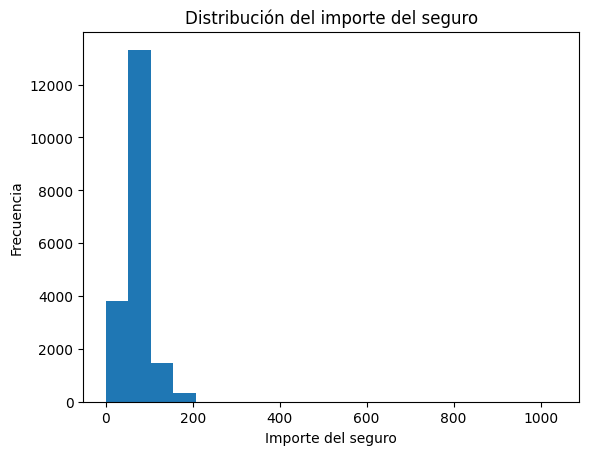

In [5]:
plt.figure()
plt.hist(df["importeseguro"], bins=20)
plt.xlabel("Importe del seguro")
plt.ylabel("Frecuencia")
plt.title("Distribución del importe del seguro")
plt.show()

*Boxplot*

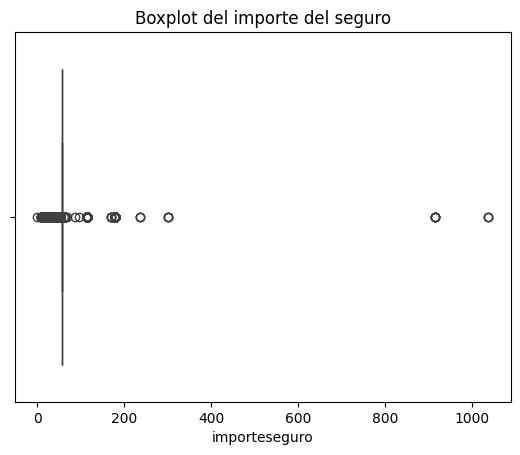

In [6]:
plt.figure()
sns.boxplot(x=df["importeseguro"])
plt.title("Boxplot del importe del seguro")
plt.show()

Edad

In [7]:
df["edad"].describe()

count    18915.000000
mean        50.178430
std         16.297704
min          0.000000
25%         41.000000
50%         52.000000
75%         62.000000
max         89.000000
Name: edad, dtype: float64

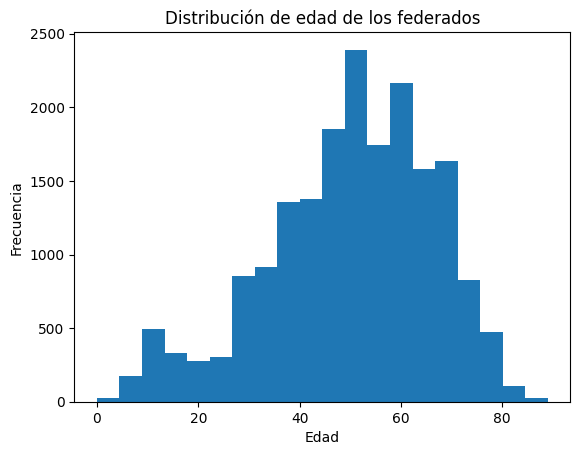

In [8]:
plt.figure()
plt.hist(df["edad"], bins=20)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de edad de los federados")
plt.show()

Sexo

In [9]:
df["sexo"].value_counts()

sexo
MASCULINO    12677
FEMENINO      6238
Name: count, dtype: int64

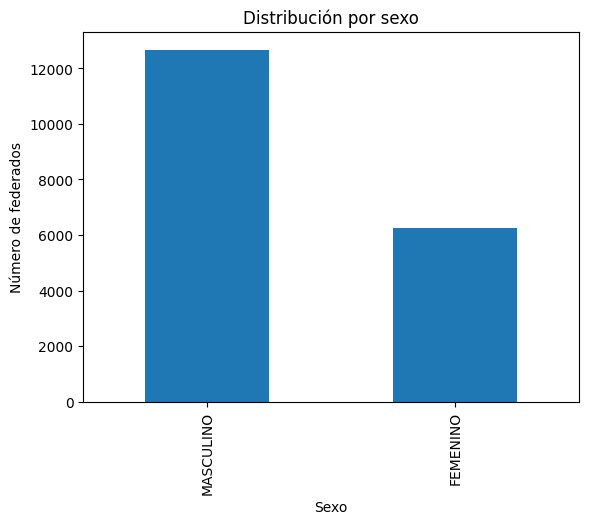

In [10]:
plt.figure()
df["sexo"].value_counts().plot(kind="bar")
plt.xlabel("Sexo")
plt.ylabel("Número de federados")
plt.title("Distribución por sexo")
plt.show()

**Análisis bivariante**

*Federados por tipo de seguro*

In [11]:
federados_por_seguro = (
    df
    .groupby("importeseguro")
    .agg(total_federados=("nsocio", "count"))
    .reset_index()
)

federados_por_seguro

,importeseguro,total_federados
0,0.00,1
1,8.03,25
2,9.68,11
3,9.85,317
4,15.49,19
5,15.62,178
6,18.24,5
7,18.28,3
8,18.92,7
9,19.24,120


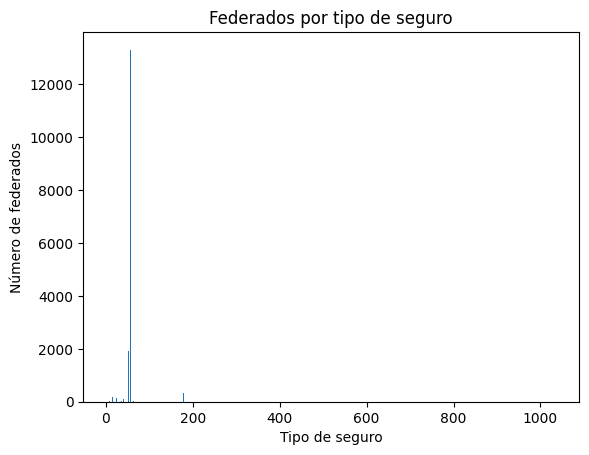

In [12]:
plt.figure()
plt.bar(
    federados_por_seguro["importeseguro"],
    federados_por_seguro["total_federados"]
)
plt.xlabel("Tipo de seguro")
plt.ylabel("Número de federados")
plt.title("Federados por tipo de seguro")
plt.show()

*Edad media por tipo de seguro*

In [13]:
edad_por_seguro = (
    df
    .groupby("importeseguro")
    .agg(
        edad_media=("edad", "mean"),
        edad_mediana=("edad", "median")
    )
    .reset_index()
)

edad_por_seguro

,importeseguro,edad_media,edad_mediana
0,0.00,70.000000,70.0
1,8.03,8.960000,9.0
2,9.68,8.909091,10.0
3,9.85,9.757098,10.0
4,15.49,9.052632,9.0
5,15.62,9.691011,10.0
6,18.24,14.000000,14.0
7,18.28,16.000000,17.0
8,18.92,8.714286,10.0
9,19.24,10.358333,11.0


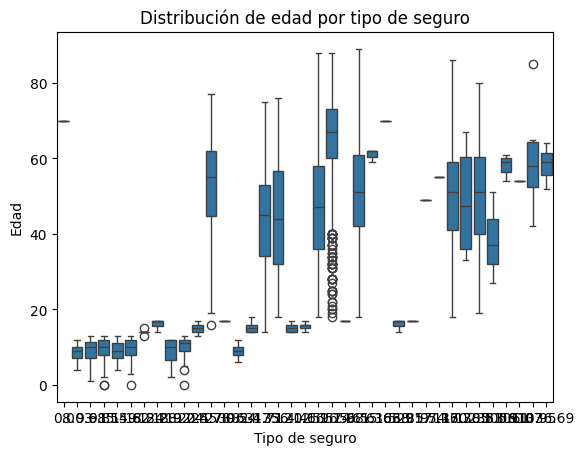

In [14]:
plt.figure()
sns.boxplot(
    data=df,
    x="importeseguro",
    y="edad"
)
plt.xlabel("Tipo de seguro")
plt.ylabel("Edad")
plt.title("Distribución de edad por tipo de seguro")
plt.show()

*Modalidad vs tipo de seguro*

In [15]:
modalidad_seguro = pd.crosstab(df["modalidad"], df["importeseguro"])

modalidad_seguro

importeseguro,0.00,8.03,9.68,9.85,15.49,15.62,18.24,18.28,18.92,19.24,...,85.74,95.36,113.30,170.05,178.81,235.56,300.61,301.07,913.95,1036.69
modalidad,,,,,,,,,,,,,,,,,,,,,
A,1,0,11,0,0,0,0,3,7,0,...,1,0,0,0,0,0,0,0,0,0
A6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AU,0,24,0,0,0,178,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,1,0,317,0,0,0,0,0,120,...,0,1,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,19,0,0,0,0,0,...,0,0,1452,4,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,324,3,0,1,0,0
D Comp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0


<Figure size 640x480 with 0 Axes>

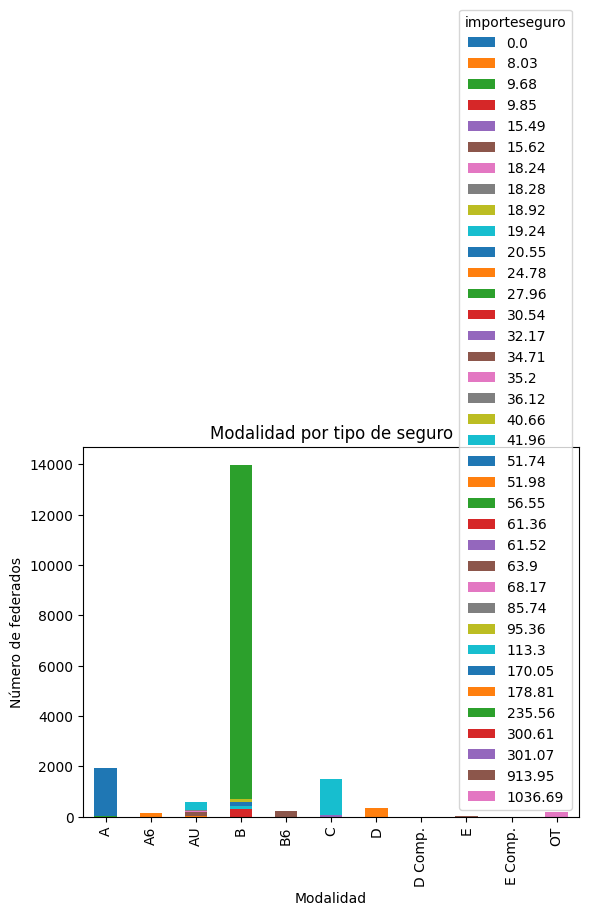

In [16]:
plt.figure()
modalidad_seguro.plot(kind="bar", stacked=True)
plt.xlabel("Modalidad")
plt.ylabel("Número de federados")
plt.title("Modalidad por tipo de seguro")
plt.show()

Hipotesis C

*Federados por temporada*

In [17]:
federados_por_temporada = (
    df
    .groupby("temporada")
    .agg(total_federados=("nsocio", "count"))
    .reset_index()
)

federados_por_temporada

,temporada,total_federados
0,2024,18915


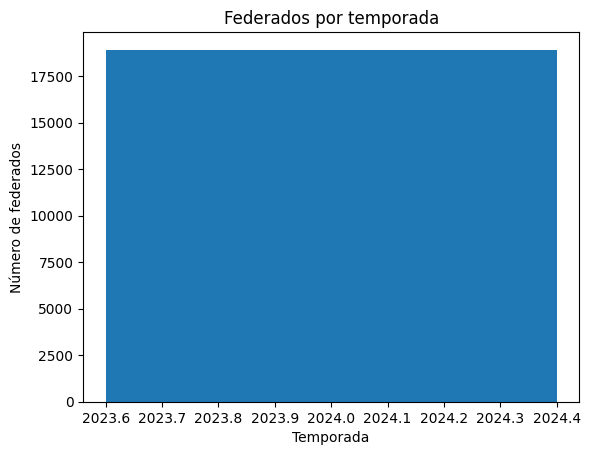

In [18]:
plt.figure()
plt.bar(
    federados_por_temporada["temporada"],
    federados_por_temporada["total_federados"]
)
plt.xlabel("Temporada")
plt.ylabel("Número de federados")
plt.title("Federados por temporada")
plt.show()

Análisis multivariante

*Correlaciones numéricas*

In [19]:
df_corr = df[["edad", "importeseguro", "cuota_socio"]].corr()

df_corr

,edad,importeseguro,cuota_socio
edad,1.000000,0.149268,0.037781
importeseguro,0.149268,1.000000,0.007079
cuota_socio,0.037781,0.007079,1.000000


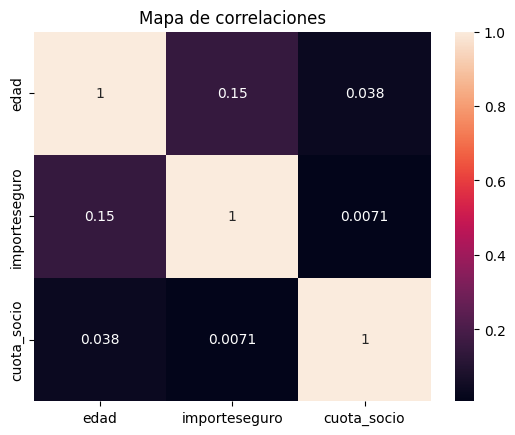

In [20]:
plt.figure()
sns.heatmap(df_corr, annot=True)
plt.title("Mapa de correlaciones")
plt.show()